# En este proyecto se hace una comparación entre espectros de Resonancia Magnética Nuclear obtenidos experimentalmente y sus equivalentes espectros obtenidos mediante una simulación con el software Gaussian.

## Inicialmente se desconocía el origen de los espectros experimentales, por lo que la comparación con los de las simulaciones permitió identificar la sustancia que produjo cada uno.

In [3]:
# !jt -t oceans16 -nfs 11 -kl -cursw 2 -cursc r -cellw 95% -T

In [4]:
#graph parameters
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md
from IPython.display import display, Math # Formato LaTeX en print

#colores para graficar
rosa = '#f21d64'
azul = '#1d7bde'

from jupyterthemes import jtplot
jtplot.style(theme='grade3', context = 'talk', ticks = True, grid = False, fscale = 2.5)

# LaTeX
# plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rc('lines', lw=3)
color_text = 'black'
plt.rcParams.update({'font.family' : 'serif', 'font.weight' : 'bold',
                     'text.color' : color_text, 'axes.labelcolor' : color_text,
                     'xtick.color' : color_text, 'ytick.color' : color_text,
                     'figure.dpi' : 50, 'savefig.format' : 'jpg', 'savefig.bbox' : 'tight',
                     'axes.titlesize' : 32, 'font.size' : 30
                    })

In [5]:
#Funciones para graficar
def nmr_exp(espectro, save, title, xlims = (-1,10)):
    fig, ax = plt.subplots()
    ax.plot(espectro['ppm'], espectro['val'], color = rosa, label = r'\textit{Espectro NMR - Experimental}')
    ax.set_xlabel(r'{\textit{ppm}}')
    ax.set_ylabel(r'{\textit{Intensidad Relativa}}')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_title(title)
    ax.legend()
    fig.tight_layout()
    plt.savefig(save)  
def nmr_sim(df, save, title, xlims = (-1,10)):
    fig, ax = plt.subplots()
    ax.plot(df['ppm'], df['val'], label = r'\textit{Espectro NMR - Simulación}')
    ax.set_xlabel(r'{\textit{ppm}')
    ax.set_ylabel(r'{\textit{Intensidad Relativa}}')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_title(title)
    ax.legend()
    fig.tight_layout()
    plt.savefig(save)

In [30]:
#Ploteo de experimental y simulacion combinados
def nmr_teo_exp(espectro_exp,
                espectro_teo,
                f1=1,
                f2=1,
                save = 'newfig.jpg',
                divide=1,
                lims1=(0, 1),
                lims2=(1, 2),
                lims3=(2, 3),
                xlabel_coords = (0.49, 0.06),
                title_coords = (0.2,1.),
                title = ' ',
                fontsize = 29
                    ):
    if divide == 1:
        fig, ax = plt.subplots()
        ax.plot(espectro_exp['ppm'], espectro_exp['val'], color=rosa, label = title + '\n' + r'\textit{Experimental}')        
        ax.plot(f1 * espectro_teo['ppm'], espectro_teo['val'], label = r'\textit{Simulación}')
        ax.set_xlim(lims1[0], lims1[1])
        ax.legend(loc = 2)
        fig.tight_layout()
    elif divide == 2:
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
        ####Primer mitad
        ax1.plot(espectro_exp['ppm'], espectro_exp['val'], color=rosa, label = r'\textit{Experimental}', alpha = 0.8)        
        ax1.plot(f1 * espectro_teo['ppm'], espectro_teo['val'], label = r'\textit{Simulación}', dashes =[2,1])
        ax1.set_xlim(lims1[0], lims1[1])
    
        ####Segunda mitad
        ax2.plot(espectro_exp['ppm'], espectro_exp['val'], color=rosa, alpha = 0.8)        
        ax2.plot(f2 * espectro_teo['ppm'], espectro_teo['val'], dashes =[2,1])
        ax2.set_xlim(lims2[0], lims2[1])
        ax1.legend(loc = 2)
        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax1.xaxis.tick_bottom()
        ax2.tick_params(labelright=False)
        ax2.yaxis.tick_right()
        
        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, 
                      linestyle="none", color='black', mec='black', mew=1, clip_on=False)
        ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
        plt.subplots_adjust(hspace = 0.02)
        
        ax1.xaxis.set_label_coords(0.7, -0.1)
        ax1.set_xlabel('.', color = 'w')
        
        ax1.set_ylabel(r'{\textit{Intensidad Relativa}}')
        fig.text(xlabel_coords[0], xlabel_coords[1], r'\textit{ppm}', color = 'black') 
        fig.text(title_coords[0], title_coords[1], title, color ='black') 
        fig.tight_layout()
    elif divide == 3:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 2, sharey = True)
        ####Primer mitad
        ax1.plot(espectro_exp['ppm'], espectro_exp['val'], color=rosa, label = r'\textit{Experimental}', alpha = 0.8)        
        ax1.plot(f1 * espectro_teo['ppm'], espectro_teo['val'], label = r'\textit{Simulación}', dashes =[2,1])
        ax1.set_xlim(lims1[0], lims1[1])
    
        ####Segunda mitad
        ax2.plot(espectro_exp['ppm'], espectro_exp['val'], color=rosa, alpha = 0.8)        
        ax2.plot(f2 * espectro_teo['ppm'], espectro_teo['val'], dashes =[2,1])
        ax2.set_xlim(lims2[0], lims2[1])
        ####Tercera mitad
        ax3.plot(espectro_exp['ppm'], espectro_exp['val'], color=rosa, alpha = 0.8)        
        ax3.plot(f3 * espectro_teo['ppm'], espectro_teo['val'], dashes =[2,1])
        ax3.set_xlim(lims1[0], lims3[1])
                
        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False); ax2.spines['right'].set_visible(False)
        ax3.spines['left'].set_visible(False)
        
        ax1.legend(loc = 2)

        ax1.xaxis.tick_bottom()
        ax2.tick_params(labelright=False)
        ax2.tick_params(labelright=True)
        ax2.yaxis.tick_right()
        
        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, 
                      linestyle="none", color='black', mec='black', mew=1, clip_on=False)
        ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
        plt.subplots_adjust(hspace = 0.02)
        
        ax1.xaxis.set_label_coords(0.7, -0.1)
        ax1.set_xlabel('.', color = 'w')
        
        ax1.set_ylabel(r'{\textit{Intensidad Relativa}}')
        fig.text(xlabel_coords[0], xlabel_coords[1], r'\textit{ppm}', color = 'black') 
        fig.text(title_coords[0], title_coords[1], title, color ='black') 
#     plt.savefig(save)

In [23]:
#Lectura de Datos
nmr_fenilalanina_exp = pd.read_csv('data_base/fenilalanina_bmse000900_simulation_1/exp_0.csv')
nmr_fenilalanina_sim = pd.read_csv('data_base/fenilalanina_bmse000900_simulation_1/sim_0.csv')

nmr_glutamina_exp = pd.read_csv('data_base/glutamine_bmse000038_simulation_1/exp_0.csv')
nmr_glutamina_sim = pd.read_csv('data_base/glutamine_bmse000038_simulation_1/sim_0.csv')

nmr_glutam_acid_exp = pd.read_csv('data_base/glutam_acid_bmse000037_simulation_1/exp_0.csv')
nmr_glutam_acid_sim = pd.read_csv('data_base/glutam_acid_bmse000037_simulation_1/sim_0.csv')

nmr_triptofano_exp = pd.read_csv('data_base/triptofano_bmse000050_simulation_1/exp_0.csv')
nmr_triptofano_sim = pd.read_csv('data_base/triptofano_bmse000050_simulation_1/sim_0.csv')

nmr_glicina_exp = pd.read_csv('data_base/glycine_bmse000089_simulation_1//exp_0.csv')
nmr_glicina_sim = pd.read_csv('data_base/glycine_bmse000089_simulation_1//sim_0.csv')

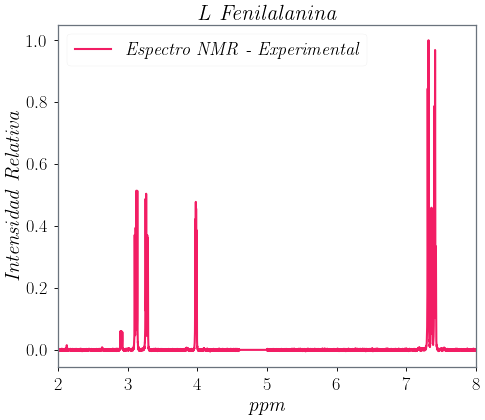

In [24]:
nmr_exp(nmr_fenilalanina_exp, 'nmr_fenilalanina_exp.jpg', r'\textit{L Fenilalanina}', xlims = (2,8))

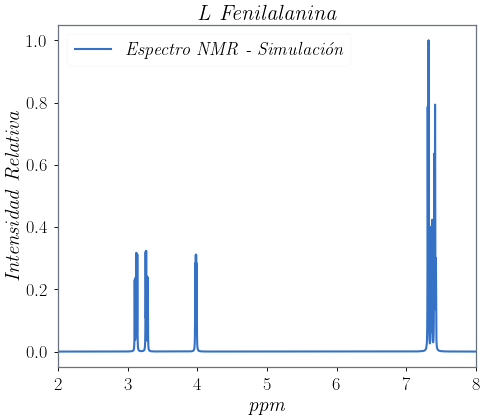

In [25]:
nmr_sim(nmr_fenilalanina_sim, 'nmr_fenilalanina_sim.jpg', r'\textit{L Fenilalanina}', xlims = (2,8))

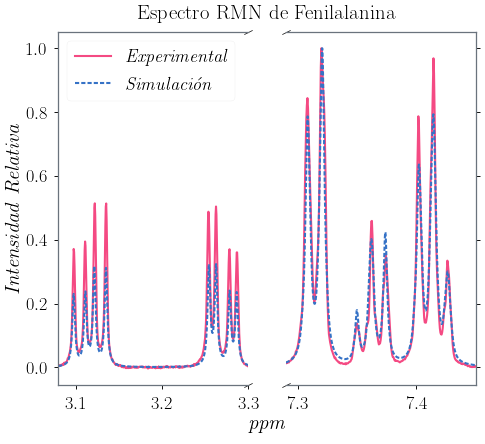

In [26]:
nmr_teo_exp(nmr_fenilalanina_exp, nmr_fenilalanina_sim, 
            divide = 2, lims1 = (3.08,3.3), lims2=(7.29,7.45), 
            title = r'Espectro RMN de Fenilalanina', title_coords=(0.3,0.97), xlabel_coords= (0.51, 0.07),
            save = 'nmr_fenilalanina_exp_and_sim.jpg')

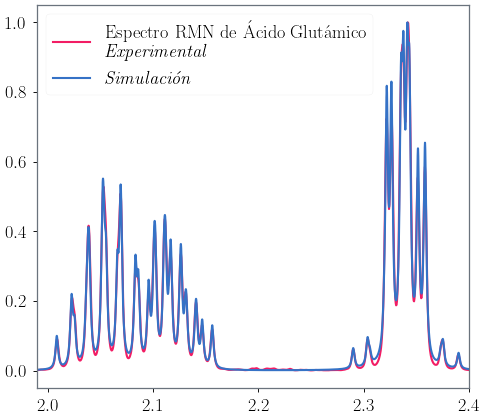

In [31]:
nmr_teo_exp(nmr_glutam_acid_exp, nmr_glutam_acid_sim, 
            divide=1,
            lims1=(1.99, 2.4),lims2=(3.725, 3.77),
            title = r'Espectro RMN de Ácido Glutámico',
            title_coords=(0.3,0.97),
            xlabel_coords= (0.51, 0.07))

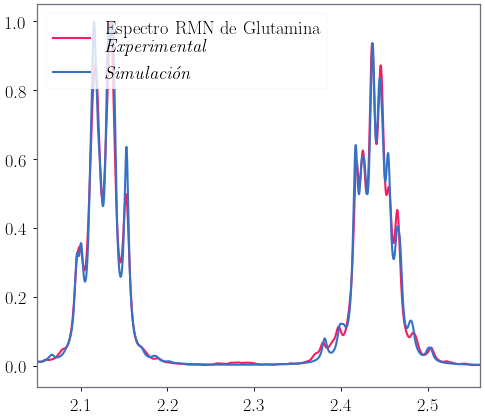

In [32]:
nmr_teo_exp(nmr_glutamina_exp, nmr_glutamina_sim, 
            divide = 1, 
            lims1 = (2.05,2.56), lims2=(3.7, 3.82),
            title = r'Espectro RMN de Glutamina', 
            title_coords=(0.3,0.97), 
            xlabel_coords= (0.51, 0.07))

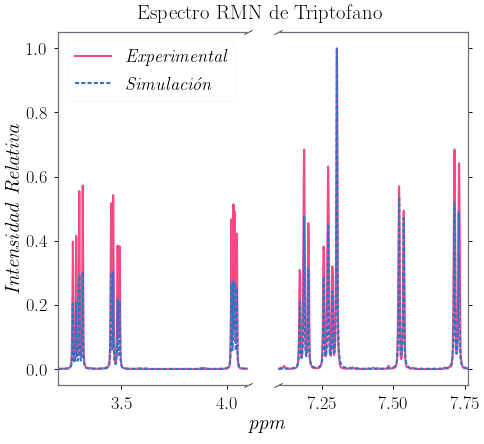

In [13]:
nmr_teo_exp(nmr_triptofano_exp, nmr_triptofano_sim, 
            divide = 2, 
            lims1 = (3.2,4.1), lims2=(7.1, 7.76),
            title = r'Espectro RMN de Triptofano', 
            title_coords=(0.3,0.97), xlabel_coords= (0.51, 0.07))

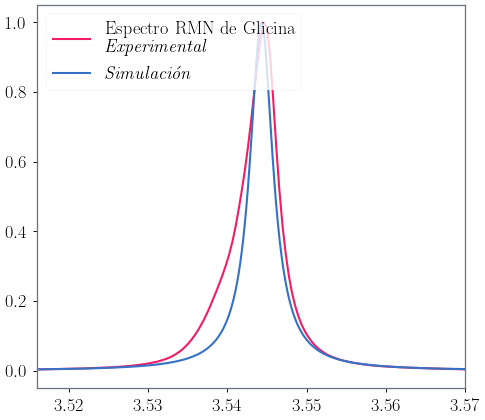

In [33]:
nmr_teo_exp(nmr_glicina_exp, nmr_glicina_sim, 
            divide = 1, lims1 = (3.516,3.57), lims2=(5,6),
            title = r'Espectro RMN de Glicina', 
            title_coords=(0.3,0.97), xlabel_coords= (0.51, 0.07))